In [512]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [513]:
#33.
a = pd.read_csv('churn.txt')         #读取文件
a = a.replace('null',np.NaN)         #如果存在缺失值，将其全换成np.NaN
a_null =a[a.isnull().values==True]   #显示存在缺失值的行列，并显示出其数值
a_null                               #可以清楚的看到，该数据集中没有缺失的数据值

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?


In [514]:
#34.比较area code和state字段
a.groupby(['State'])['Area Code'].nunique() #可以看出每个State的Area Code都是只有三个唯一值

State
AK    3
AL    3
AR    3
AZ    3
CA    3
CO    3
CT    3
DC    3
DE    3
FL    3
GA    3
HI    3
IA    3
ID    3
IL    3
IN    3
KS    3
KY    3
LA    3
MA    3
MD    3
ME    3
MI    3
MN    3
MO    3
MS    3
MT    3
NC    3
ND    3
NE    3
NH    3
NJ    3
NM    3
NV    3
NY    3
OH    3
OK    3
OR    3
PA    3
RI    3
SC    3
SD    3
TN    3
TX    3
UT    3
VA    3
VT    3
WA    3
WI    3
WV    3
WY    3
Name: Area Code, dtype: int64

In [515]:
a.groupby(['State'])['Area Code'].unique() #求一下每个State的唯一值是多少，可以发现都是408 415 510

State
AK    [408, 415, 510]
AL    [510, 408, 415]
AR    [510, 415, 408]
AZ    [415, 408, 510]
CA    [415, 408, 510]
CO    [408, 415, 510]
CT    [415, 408, 510]
DC    [415, 510, 408]
DE    [408, 510, 415]
FL    [415, 510, 408]
GA    [415, 408, 510]
HI    [510, 415, 408]
IA    [408, 415, 510]
ID    [408, 415, 510]
IL    [415, 408, 510]
IN    [415, 408, 510]
KS    [415, 408, 510]
KY    [415, 408, 510]
LA    [408, 415, 510]
MA    [510, 415, 408]
MD    [408, 510, 415]
ME    [415, 510, 408]
MI    [415, 510, 408]
MN    [510, 408, 415]
MO    [415, 510, 408]
MS    [408, 415, 510]
MT    [510, 408, 415]
NC    [408, 415, 510]
ND    [408, 415, 510]
NE    [415, 408, 510]
NH    [510, 408, 415]
NJ    [415, 408, 510]
NM    [510, 415, 408]
NV    [415, 510, 408]
NY    [415, 408, 510]
OH    [415, 408, 510]
OK    [415, 408, 510]
OR    [408, 415, 510]
PA    [415, 408, 510]
RI    [415, 408, 510]
SC    [415, 408, 510]
SD    [408, 415, 510]
TN    [415, 408, 510]
TX    [415, 510, 408]
UT    [415, 408, 510]
VA  

In [516]:
a.groupby(['Area Code'])['State'].nunique() #可以看出每个Area Code的State都是有51个唯一值

Area Code
408    51
415    51
510    51
Name: State, dtype: int64

In [517]:
a.groupby(['Area Code'])['State'].unique() #求出每个Area Code的唯一值是多少

Area Code
408    [OH, LA, IA, ID, CO, WY, MT, AZ, OK, AK, NJ, G...
415    [KS, OH, NJ, OK, MO, WV, IN, RI, IA, NY, TX, F...
510    [AL, MA, MT, VT, VA, HI, NH, AR, WI, MN, TX, N...
Name: State, dtype: object

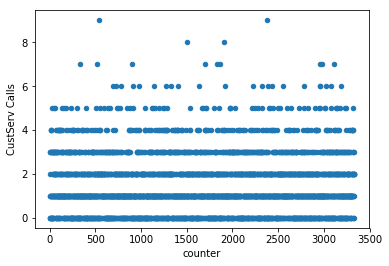

In [518]:
#35.用图形表示
a['counter'] = range(len(a))      #给数据集中增添一列，从0到最大行数
a.plot.scatter(x='counter',y = 'CustServ Calls')
plt.show()

In [519]:
#36.先求出所有客户服务电话的极差
a = pd.read_csv('churn.txt')
a_calls = a['CustServ Calls']
print('极差',max(a_calls)-min(a_calls))

极差 9


In [520]:
#然后求出所有客户服务电话的Z-score标准化
a=pd.DataFrame(a_calls)
a_scaled = preprocessing.scale(a)
a_scaled

array([[-0.42793202],
       [-0.42793202],
       [-1.1882185 ],
       ...,
       [ 0.33235445],
       [ 0.33235445],
       [-1.1882185 ]])

In [521]:
#使用Z-score方法识别所有可能的离群值，并求出去除离群值以后的极差，可以发现之前极差是9，现在极差是5，差距很大
for i in range(len(a_calls)):
    if  a_scaled[i] < -3 or a_scaled[i] > 3:
        print('z_score离群值',a_calls[i],i)
        a_calls.pop(i)
print('z_score去除离群值后的极差',max(a_calls)-min(a_calls))

z_score离群值 7 332
z_score离群值 7 522
z_score离群值 9 542
z_score离群值 6 694
z_score离群值 6 721
z_score离群值 6 778
z_score离群值 7 902
z_score离群值 6 908
z_score离群值 6 974
z_score离群值 6 1142
z_score离群值 6 1273
z_score离群值 6 1325
z_score离群值 6 1407
z_score离群值 8 1502
z_score离群值 6 1638
z_score离群值 7 1694
z_score离群值 7 1831
z_score离群值 7 1865
z_score离群值 8 1912
z_score离群值 6 1919
z_score离群值 6 2223
z_score离群值 6 2327
z_score离群值 9 2380
z_score离群值 6 2387
z_score离群值 6 2428
z_score离群值 6 2553
z_score离群值 6 2786
z_score离群值 7 2953
z_score离群值 6 2958
z_score离群值 6 2961
z_score离群值 7 2979
z_score离群值 6 3026
z_score离群值 6 3081
z_score离群值 7 3112
z_score离群值 6 3190
z_score去除离群值后的极差 5


In [522]:
#用IQR的方法计算是否为离散值，先求出Q1和Q3
np.percentile(a, (25, 50, 75), interpolation='midpoint')

array([1., 1., 2.])

In [523]:
#可以看出Q1=1,Q3=2
Q1=1
Q3=2
IQR=Q3-Q1
x=Q1-IQR
y=Q3+IQR
print("IQR=%f"%IQR)
print("Q1-IQR=%f"%x)
print("Q3+IQR=%f"%y)

IQR=1.000000
Q1-IQR=0.000000
Q3+IQR=3.000000


In [524]:
#用IQR的方法识别所有的离散值，并求出去除离群值以后的极差，可以发现之前极差是9，现在极差是3，差距更大，所以最好保存
a = pd.read_csv('churn.txt')
a_calls = a['CustServ Calls']#由于上面已经对数据进行修改，所以需要重新载入
a=pd.DataFrame(a_calls)
for i in range(len(a_calls)):
    if  a.values[i]<0 or a.values[i]>3:
        print('IQR离群值',a_calls[i],i)
        a_calls.pop(i)
print('IQR去除离群值后的极差',max(a_calls)-min(a_calls))

IQR离群值 4 10
IQR离群值 4 14
IQR离群值 4 15
IQR离群值 5 21
IQR离群值 5 48
IQR离群值 5 54
IQR离群值 4 69
IQR离群值 4 77
IQR离群值 4 86
IQR离群值 4 97
IQR离群值 4 100
IQR离群值 4 105
IQR离群值 4 112
IQR离群值 4 126
IQR离群值 4 127
IQR离群值 4 133
IQR离群值 5 136
IQR离群值 5 154
IQR离群值 4 180
IQR离群值 5 181
IQR离群值 4 198
IQR离群值 4 228
IQR离群值 5 235
IQR离群值 4 248
IQR离群值 4 250
IQR离群值 4 251
IQR离群值 4 255
IQR离群值 4 266
IQR离群值 5 293
IQR离群值 4 298
IQR离群值 4 307
IQR离群值 7 332
IQR离群值 4 349
IQR离群值 4 350
IQR离群值 4 351
IQR离群值 4 366
IQR离群值 4 385
IQR离群值 5 392
IQR离群值 4 404
IQR离群值 4 407
IQR离群值 4 449
IQR离群值 4 473
IQR离群值 4 498
IQR离群值 5 509
IQR离群值 4 521
IQR离群值 7 522
IQR离群值 4 534
IQR离群值 9 542
IQR离群值 5 547
IQR离群值 4 549
IQR离群值 4 550
IQR离群值 5 588
IQR离群值 4 612
IQR离群值 4 627
IQR离群值 5 635
IQR离群值 5 655
IQR离群值 4 692
IQR离群值 6 694
IQR离群值 4 711
IQR离群值 6 721
IQR离群值 5 736
IQR离群值 5 742
IQR离群值 5 771
IQR离群值 6 778
IQR离群值 5 841
IQR离群值 4 865
IQR离群值 4 871
IQR离群值 5 874
IQR离群值 4 879
IQR离群值 4 894
IQR离群值 7 902
IQR离群值 4 905
IQR离群值 6 908
IQR离群值 5 911
IQR离群值 4 935
IQR离群值 4 944
IQR离群值 4 951
IQR离群值 6 

In [525]:
#37.对Day Mins进行标准化
a=pd.read_csv('churn.txt')
a_calls = a['Day Mins']
a_ndarray = np.array(a_calls)
a_mean = np.mean(a_ndarray)
a_median = np.median(a_ndarray)
a_std = np.std(a_ndarray)
a=pd.DataFrame(a_calls)
a_scaled = preprocessing.scale(a)
a_scaled

array([[ 1.56676695],
       [-0.33373776],
       [ 1.16830364],
       ...,
       [ 0.01881963],
       [ 0.62477766],
       [ 1.00304237]])

In [526]:
#38a.计算day minutes的倾斜度
a_qing=3*(a_mean-a_median)/a_std
a_qing

0.020663031485268494

In [527]:
#38b.Z-score标准化的倾斜度
as_ndarray = np.array(a_scaled)
as_mean = np.mean(as_ndarray)
as_median = np.median(as_ndarray)
as_std = np.std(as_ndarray)
as_qing=3*(as_mean-as_median)/as_std
as_qing

0.020663031485270687

In [528]:
#38c.由于倾斜度非常小，所以我认为是几乎完全对称的

In [529]:
#39.
a_calls.to_excel(r"C:\Users\89478\Desktop\39.xlsx")

In [530]:
#40
a=pd.read_csv('churn.txt')
a_calls = a['Intl Mins']
a_calls.to_excel(r"C:\Users\89478\Desktop\40.xlsx")

In [531]:
#41
a=pd.read_csv('churn.txt')
a_calls = a['Night Mins']
a=pd.DataFrame(a_calls)
a_scaled = preprocessing.scale(a)
a_scaled

array([[ 0.86674322],
       [ 1.05857074],
       [-0.75686906],
       ...,
       [-0.1774313 ],
       [-1.21962822],
       [ 0.80148231]])

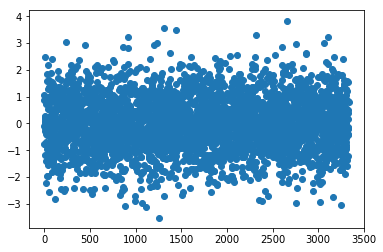

In [532]:
a['counter'] = range(len(a_scaled))      #给数据集中增添一列，从0到最大行数
plt.scatter(x=a['counter'],y = a_scaled)
plt.show()